<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html week15.do.txt --no_mako -->
<!-- dom:TITLE: PHY321: Variational calculus and Lagrange formalism -->

# PHY321: Variational calculus and Lagrange formalism
**[Morten Hjorth-Jensen](http://mhjgit.github.io/info/doc/web/)**, Department of Physics and Astronomy and Facility for Rare Isotope Beams (FRIB), Michigan State University, USA and Department of Physics, University of Oslo, Norway

Date: **Apr 18, 2022**

## Aims and Overarching Motivation

### Monday April 18

* Euler-Lagrange equations and the Lagrangian with examples

* Principle of Least Action, watch [Feynman Lecture](https://www.feynmanlectures.caltech.edu/II_19.html).

**Reading suggestion**: Taylor sections 6.1-6.4

### Wednesday April 20

* Lagrangian formalism, constrained and unconstrained motion

**Reading suggestion**: Taylor sections 7.1-7.4

### Friday April 22

* Variational Calculus with examples

* Discussions and work on hw9, note changed deadline for hw9. The deadline is changed to April 28.  An additional homework 10 will be made availbale towards the end of this week for those of you who would like to get an additional score of $10\%$.

## Why is Lagrangian defined as the difference between kinetic and potential energy?

To understand this let us develop some intuition before the math by looking at what we did in the second midterm. There we studied energy conservation.

Text(0, 0.5, 'E')

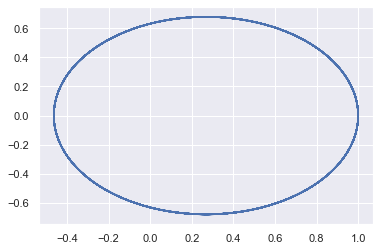

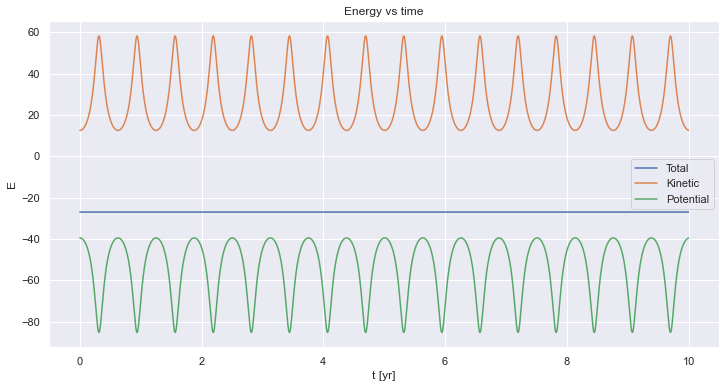

In [7]:
%matplotlib inline

# let's start by importing useful packages we are familiar with
import numpy as np
from math import *
import matplotlib.pyplot as plt
import seaborn as sns
import math 

#Velocity-Verlet Method
DeltaT = 0.001
#set up arrays 
tfinal = 10 # in years
n = ceil(tfinal/DeltaT)
# set up arrays for time t, velocity v, and position r
t = np.zeros(n)
v = np.zeros((n,2))
r = np.zeros((n,2))
# Initial conditions as compact 2-dimensional arrays. Here: circular orbit conditions.
r0 = np.array([1.0,0.0])
v0 = np.array([0.0,5.0])
r[0] = r0
v[0] = v0
Fourpi2 = 4*pi*pi
# Start integrating using the Velocity-Verlet method
for i in range(n-1):
    # Set up the accelerationn
    rabs = sqrt(sum(r[i]*r[i]))
    a = -Fourpi2*r[i]/(rabs**3)
    # update velocity, time and position using the Velocity-Verlet  method
    r[i+1] = r[i] + DeltaT*v[i] + ((DeltaT**2)/2)*(a)
    rabs = sqrt(sum(r[i+1]*r[i+1]))
    anew = -4*(pi**2)*r[i+1]/(rabs**3)
    v[i+1] = v[i] + DeltaT*(0.5)*(a + anew)
    t[i+1] = t[i] + DeltaT
sns.set()
plt.plot(r[:,0], r[:,1])


# We check that the total energy is conserved. For a circular orbit, potential and kinetic energy do not change since the radius is a constant. 

# Note that we have set the mass of the Earth = 1
def kinetic_energy(v):
    KE = []
    step = len(t)
    for i in range(step):
        KE.append(0)
        KE[i] += 0.5 *np.sum(v[i]*v[i])
    return np.array(KE)


# Note that G x Mass_sun = 4*pi*pi and the mass of the Earth = 1
# Note also that if you change the exponent in the force you need also to change the potential energy!
def pot():
    Pot = []
    step = len(t)
    for i in range(step):
        Pot.append(0)
        Pot[i] +=  - 4*pi*pi/ sqrt(np.sum(r[i]*r[i]))
    return np.array(Pot)

fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.plot(t,kinetic_energy(v)+pot(),label='Total')
ax.plot(t,kinetic_energy(v),label='Kinetic')
ax.plot(t,pot(),label='Potential')
ax.set_title('Energy vs time')
ax.set_xlabel('t [yr]')
ax.legend()
ax.set_ylabel(r'E')

The energy is conserved and does not say much about the variations in position and velocity as functions of time.

## What if we plot the difference between kinetic and potential energy instead?

Text(0, 0.5, 'E')

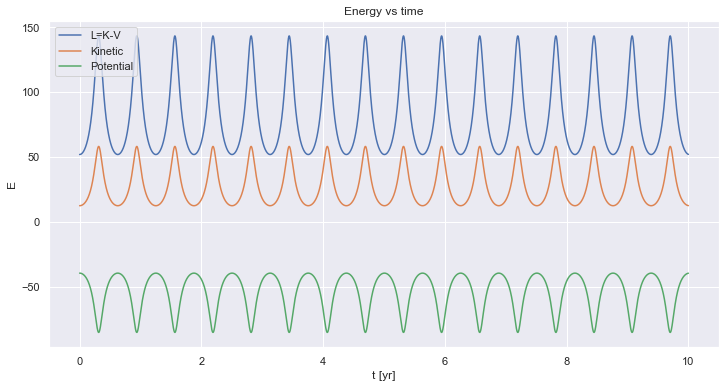

In [8]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.plot(t,kinetic_energy(v)-pot(),label='L=K-V')
ax.plot(t,kinetic_energy(v),label='Kinetic')
ax.plot(t,pot(),label='Potential')
ax.set_title('Energy vs time')
ax.set_xlabel('t [yr]')
ax.legend()
ax.set_ylabel(r'E')

## Variational Calculus

The calculus of variations involves 
problems where the quantity to be minimized or maximized is an integral. 

The usual minimization problem one faces involves taking a function
${\cal L}(x)$, then finding the single value $x$ for which ${\cal L}$
is either a maximum or minimum. In multivariate calculus one also
learns to solve problems where you minimize for multiple variables,
${\cal L}(x_1,x_2,\cdots x_n)$, and finding the points $(x_1\cdots
y_n)$ in an $n$-dimensional space that maximize or minimize the
function. Here, we consider what seems to be a much more ambitious
problem. Imagine you have a function ${\cal L}(x(t),\dot{x}(t),t)$,
and you wish to find the extrema for an infinite number of values of
$x$, i.e. $x$ at each point $t$. The function ${\cal L}$ will not only
depend on $x$ at each point $t$, but also on the slope at each point,
plus an additional dependence on $t$. Note we are NOT finding an
optimum value of $t$, we are finding the set of optimum values of $x$
at each point $t$, or equivalently, finding the function $x(t)$.

## Variational Calculus, introducing the action

One treats the function $x(t)$ as being unknown while minimizing the action

$$
S=\int_{t_1}^{t_2}dt~{\cal L}(x(t),\dot{x}(t),t).
$$

Thus, we are minimizing $S$ with respect to an infinite number of
values of $x(t_i)$ at points $t_i$. As an additional criteria, we will
assume that $x(t_1)$ and $x(t_2)$ are fixed, and that that we will
only consider variations of $x$ between the boundaries. The dependence
on the derivative, $\dot{x}=dx/dt$, is crucial because otherwise the
solution would involve simply finding the one value of $x$ that
minimized ${\cal L}$, and $x(t)$ would equal a constant if there were no
explicit $t$ dependence. Furthermore, $x$ wouldn't need to be
continuous at the boundary.

## Variational Calculus, general Action

In the general case we have an integral of the type

$$
S[q]= \int_{t_1}^{t_2} {\cal L}(q(t),\dot{q}(t),t)dt,
$$

where $S$ is the quantity which is sought minimized or maximized.  The
problem is that although ${\cal L}$  is a function of the general variables
$q(t),\dot{q}(t),t$ (note our change of variables), the exact dependence of $q$ on $t$ is not known.
This means again that even though the integral has fixed limits $t_1$
and $t_2$, the path of integration is not known. In our case the unknown
quantities are the positions and general velocities of a given number
of objects and we wish to choose an integration path which makes the
functional $S[q]$ stationary. This means that we want to find minima,
or maxima or saddle points. In physics we search normally for minima.
Our task is therefore to find the minimum of $S[q]$ so that its
variation $\delta S$ is zero subject to specific constraints.  The
constraints can be treated via the technique of Lagrangian multipliers
as we will see below.

## Variational Calculus, Optimal Path

We assume the existence of an optimum path, that is a path for which
$S[q]$ is stationary. There are infinitely many such paths.  The
difference between two paths $\delta q$ is called the variation of
$q$.

We call the variation $\eta(t)$ and it is scaled by a factor $\alpha$.
The function $\eta(t)$ is arbitrary except for

$$
\eta(t_1)=\eta(t_2)=0,
$$

and we assume that we can model the change in $q$ as

$$
q(t,\alpha) = q(t)+\alpha\eta(t),
$$

and

$$
\delta q = q(t,\alpha) -q(t,0)=\alpha\eta(t).
$$

## Variational Calculus, Condition for an Extreme Value

We choose $q(t,\alpha=0)$ as the unkonwn path  that will minimize $S$.  The value
$q(t,\alpha\ne 0)$  describes a neighbouring path.

We have

$$
S[q(\alpha)]= \int_{t_1}^{t_2} {\cal L}(q(t,\alpha),\dot{q}(t,\alpha),t)dt.
$$

The condition for an extreme of

$$
S[q(\alpha)]= \int_{t_1}^{t_2} {\cal L}(q(t,\alpha),\dot{q}(t,\alpha),t)dt,
$$

$$
\left[\frac{\partial  S[q(\alpha)]}{\partial t}\right]_{\alpha=0} =0.
$$

## Variational Calculus. $\alpha$ Dependence

The $\alpha$ dependence is contained in $q(t,\alpha)$ and $\dot{q}(t,\alpha)$ meaning that

$$
\left[\frac{\partial  E[q(\alpha)]}{\partial \alpha}\right]=\int_{t_1}^{t_2} \left( \frac{\partial {\cal l}}{\partial q}\frac{\partial q}{\partial \alpha}+\frac{\partial {\cal L}}{\partial \dot{q}}\frac{\partial \dot{q}}{\partial \alpha}\right)dt.
$$

We have defined

$$
\frac{\partial q(x,\alpha)}{\partial \alpha}=\eta(x)
$$

and thereby

$$
\frac{\partial \dot{q}(t,\alpha)}{\partial \alpha}=\frac{d(\eta(t))}{dt}.
$$

## Integrating by Parts

Using

$$
\frac{\partial q(t,\alpha)}{\partial \alpha}=\eta(t),
$$

and

$$
\frac{\partial \dot{q}(t,\alpha)}{\partial \alpha}=\frac{d(\eta(t))}{dt},
$$

in the integral gives

$$
\left[\frac{\partial  S[q(\alpha)]}{\partial \alpha}\right]=\int_{t_1}^{t_2} \left( \frac{\partial {\cal L}}{\partial q}\eta(t)+\frac{\partial {\cal L}}{\partial \dot{q}}\frac{d(\eta(t))}{dt}\right)dt.
$$

Integrating the second term by parts

$$
\int_{t_1}^{t_2} \frac{\partial {\cal L}}{\partial \dot{q}}\frac{d(\eta(t))}{dt}dt =\eta(t)\frac{\partial {\cal L}}{\partial \dot{q}}|_{t_1}^{t_2}-
\int_a^b \eta(t)\frac{d}{dx}\frac{\partial {\cal L}}{\partial \dot{q}}dt,
$$

and since the first term dissappears due to $\eta(a)=\eta(b)=0$, we obtain

$$
\left[\frac{\partial  S[q(\alpha)]}{\partial \alpha}\right]=\int_{t_1}^{t_2} \left( \frac{\partial {\cal L}}{\partial q}-\frac{d}{dx}\frac{\partial {\cal L}}{\partial \dot{q}}
\right)\eta(t)dt=0.
$$

## Euler-Lagrange Equations

The latter can be written as

$$
\left[\frac{\partial  S[q(\alpha)]}{\partial \alpha}\right]_{\alpha=0}=\int_{t_1}^{t_2} \left( \frac{\partial {\cal L}}{\partial q}-\frac{d}{\
dx}\frac{\partial {\cal L}}{\partial \dot{q}}\right)\delta q(t)dt=\delta S = 0.
$$

The condition for a stationary value is thus a partial differential equation

$$
\frac{\partial {\cal L}}{\partial q}-\frac{d}{dx}\frac{\partial {\cal L}}{\partial \dot{q}}=0,
$$

known as the **Euler-Lagrange** equation.

## Constrained motion

Sometimes an auxiliary constraint is added to the problem (beyond
fixing the end poits $y_1$ and $y_2$). Just ahead, we will work on the
example of a hanging chain. The shape of the curve minimizes the
potential energy, under the constraint of a fixed length of
chain. Before presenting such an example we first review the method of
Lagrange multipliers as a method for finding minima or maxima under
constraints.

Imagine a function $f(x_1,x_2\cdots x_n)$ for which you wish to find
the minima. Additionally, you are given a constraint

$$
\begin{eqnarray}
C(x_1\cdots x_n)=0
\end{eqnarray}
$$

## Constrained motion, Condition for a Minimum

The usual condition for a a minimum is

$$
\begin{eqnarray}
\frac{\partial f}{\partial x_i}=0{\rm ,~~or~}\nabla f=0.
\end{eqnarray}
$$

which would be $n$ equations for the $n$ variables. The gradient of a
scalar is a vector, so you should think of $\nabla$ as
$\boldsymbol{\nabla}$. However, the solution will likely not satisfy the
constraint, i.e. the point at which $f(x_1\cdots x_n)$ has an extrema,
may not be a point where $C(x_1\cdots x_n)=0$.

## Constrained motion, Necessary Conditions

A necessary condition for the solution is that

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
\nabla f\cdot\boldsymbol{\epsilon}=0,
\label{_auto1} \tag{1}
\end{equation}
$$

for any infinitesimal vector $\boldsymbol{\epsilon}$ if $\boldsymbol{\epsilon}$
satisfies the condition

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation}
\delta C=\nabla C\cdot\boldsymbol{\epsilon}=0.
\label{_auto2} \tag{2}
\end{equation}
$$

## Constrained motion

That is to say if I take a small step in a direction that doesn't
change the constraint, then $f$ must not change if it is an
extrema. Not changing the constraint implies the step is orthogonal to
$\nabla C$. As there are $n$ dimensions of $x$, the vector $\nabla C$
defines one direction, and $\boldsymbol{\epsilon}$ can be in any of the $n-1$
directions orthogonal to $\nabla C$. If $\nabla f\cdot\boldsymbol{\epsilon}=0$
for ANY of the $n-1$ directions of $\boldsymbol{\epsilon}$ orthogonal to
$\nabla C$, then

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation}
\nabla f ~||~ \nabla C.
\label{_auto3} \tag{3}
\end{equation}
$$

Because the two vectors are parallel you can say there must exist some
constant $\lambda$ such that

<!-- Equation labels as ordinary links -->
<div id="_auto4"></div>

$$
\begin{equation}
\nabla(f-\lambda C)=0.
\label{_auto4} \tag{4}
\end{equation}
$$

## Constrained motion, Lagrange Multiplier

Here, $\lambda$ is known as a Lagrange multiplier. Satisfying
this equation  is a necessary, but not a sufficient
condition. One could add a constant to the constraint and the gradient
would not change. One must find the correct value of $\lambda$ that
satisfies the constraint $C=0$, rather than $C=$ some other
constant. The strategy is then to solve
thw above equation  then adjust $\lambda$ until one
finds the $x_1\cdots x_n$ that gives $C(x_1\cdots x_n)=0$.

The method of Lagrange multipliers is counter-intuitive to one's
intuition to use the constraint to reduce the dimensionality of the
problem. Normally, minimizing a function of $n$ variables, leads to
$n$ equations and $n$ unknowns. A constraint could be used, by
substitution, to replace the $n$ variables with $n-1$
variables. Instead, we add an unknown parameter, $\lambda$, and change
the equation to $n+1$ equations with $n+1$ unknowns, with the extra
unknown being the Lagrange multiplier $\lambda$. Often, it is rather
easy to solve for $x_1\cdots x_n$. Then one is left with the usually
difficult problem of finding $\lambda$, often requiring the solution
of a transcendental equation.

## Lagrange Multipliers

Let us try to formalize this. We consider a function of three independent variables $f(x,y,z)$ . For
the function $f$ to be an extreme we have

$$
df=0.
$$

A necessary and sufficient condition is

$$
\frac{\partial f}{\partial x} =\frac{\partial f}{\partial y}=\frac{\partial f}{\partial z}=0,
$$

due to

$$
df = \frac{\partial f}{\partial x}dx+\frac{\partial f}{\partial y}dy+\frac{\partial f}{\partial z}dz.
$$

## Independent Variables

In physical problems the variables $x,y,z$ are often subject to constraints (in our case $q$ and the orthogonality constraint)
so that they are no longer all independent. It is possible at least in principle to use each constraint to eliminate one variable
and to proceed with a new and smaller set of independent varables.

The use of so-called Lagrangian  multipliers is an alternative technique  when the elimination of
of variables is incovenient or undesirable.  Assume that we have an equation of constraint on the variables $x,y,z$

$$
\phi(x,y,z) = 0,
$$

resulting in

$$
d\phi = \frac{\partial \phi}{\partial x}dx+\frac{\partial \phi}{\partial y}dy+\frac{\partial \phi}{\partial z}dz =0.
$$

## More on Independent Variables

Now we cannot set anymore

$$
\frac{\partial f}{\partial x} =\frac{\partial f}{\partial y}=\frac{\partial f}{\partial z}=0,
$$

if $df=0$ is wanted
because there are now only two independent variables!  Assume $x$ and $y$ are the independent variables.
Then $dz$ is no longer arbitrary.

However, we can add to

$$
df = \frac{\partial f}{\partial x}dx+\frac{\partial f}{\partial y}dy+\frac{\partial f}{\partial z}dz,
$$

a multiplum of $d\phi$, viz. $\lambda d\phi$, resulting  in

$$
df+\lambda d\phi = (\frac{\partial f}{\partial z}+\lambda\frac{\partial \phi}{\partial x})dx+(\frac{\partial f}{\partial y}+\lambda\frac{\partial \phi}{\partial y})dy+(\frac{\partial f}{\partial z}+\lambda\frac{\partial \phi}{\partial z})dz =0.
$$

## Choice of Multiplier

Our multiplier is chosen so that

$$
\frac{\partial f}{\partial z}+\lambda\frac{\partial \phi}{\partial z} =0.
$$

However, we took $dx$ and $dy$ as to be arbitrary and thus we must have

$$
\frac{\partial f}{\partial x}+\lambda\frac{\partial \phi}{\partial x} =0,
$$

and

$$
\frac{\partial f}{\partial y}+\lambda\frac{\partial \phi}{\partial y} =0.
$$

When all these equations are satisfied, $df=0$.  We have four
unknowns, $x,y,z$ and $\lambda$. Actually we want only $x,y,z$,
$\lambda$ need not to be determined, it is therefore often called
Lagrange's undetermined multiplier.  If we have a set of constraints
$\phi_k$ we have the equations

$$
\frac{\partial f}{\partial x_i}+\sum_k\lambda_k\frac{\partial \phi_k}{\partial x_i} =0.
$$

## Example: brachiostone I

Consider a particle constrained to move along a path (like a bead
moving without friction on a wire) and you need to design a path from
$x=y=0$ to some final point $x_f,y_f$. Assume there is a constant
force in the $x$ direction, $F_x=mg$. Design the path so that the time
the bead travels is a minimum.

The net time is

$$
T=\int \frac{d\ell}{v}=\int_0^{x_f} dx~\frac{\sqrt{1+y'^2}}{\sqrt{2gx}}={\rm minimum}.
$$

## Example: brachiostone II

Here we made use of the fact that $d\ell=\sqrt{dx^2+dy^2}$ and that
the velocity is determined by $KE=mv^2/2=mgx$. The Euler equations can
be applied if you first define the function as

$$
\begin{eqnarray*}
f(y,y';x)&=&\frac{\sqrt{1+y'^2}}{\sqrt{x}}.
\end{eqnarray*}
$$

The equations are then

$$
\begin{eqnarray*}
\frac{d}{dx}\frac{\partial f}{\partial y'}&=&0.
\end{eqnarray*}
$$

## Example: brachiostone III

The simplification ensued from $f$ not having any dependence on $y$. This yields the differential equation

$$
\begin{eqnarray}
\frac{y'}{x^{1/2}(1+y'^2)^{1/2}}&=&(2a)^{-1/2},
\end{eqnarray}
$$

because $\partial f/\partial y'$ must be a constant, which with some
foresight we label $(2a)^{-1/2}$. One can now solve for $y'$,

$$
\begin{eqnarray*}
(y')^2&=&2ax(1+y'^2)\\
\nonumber
y'&=&\sqrt{\frac{x}{2a-x}},\\
\nonumber
y(t)&=&\int_0^x dx'~\frac{\sqrt{x'}dx'}{\sqrt{2a-x'}}=\int_0^x dx'~\frac{x'dx'}{\sqrt{2ax'-x'^2}}\\
\nonumber
&=&\frac{1}{2}\int_0^x\frac{(2x'-2a)dx'}{(2ax'-x'^2)^{1/2}}+a\int_0^x\frac{dx'}{\sqrt{2ax'-x'^2}}\\
\nonumber
&=&\frac{-1}{2}\int_0^{2ax-x^2}\frac{du}{\sqrt{u}}+a\int_0^x\frac{dx'}{\sqrt{a^2-(x'-a)^2}}\\
&=&-\sqrt{2ax-x^2}+a\cos^{-1}(1-x/a).
\end{eqnarray*}
$$

This turns out to be the equation for a {\it cycloid} or a {\it
brachiostone}. If you rolled a wheel of radius $a$ down the $y$ axis
and followed a point on the rim, it would trace out a cycloid. Here,
the constant $a$ must be chosen to match the boundary condition,
$y_2=y(x_2)$. You can see the textbook for more details, plus you get
a chance to work with cycloids in the exercises at the end of this
chapter.

## Maximizing a Function

As an example of using Lagrange multipliers for a standard
optimization formula we attempt to maximize the following function,

$$
F(x_1\cdots x_n)=-\sum_{i=1}^n x_i\ln(x_i),
$$

with respect to the $n$ variables $x_i$. With no constraints, each
$x_i$ would maximize the function for

$$
\begin{eqnarray*}
\frac{d}{dx_j}~\left[-\sum_i x_i\ln(x_i)\right]&=&0\\
-\ln(x_j)-1&=&0,~~~~x_j=e^{-1}.
\end{eqnarray*}
$$

## Two Constraints

Now, we repeat the problem but with two constraints,

$$
\sum_ix_i=1~,~~~~\sum_ix_i\epsilon_i=E.
$$

Here, $\epsilon_i$ and $E$ are fixed constants. We go forward by
finding the extrema for

$$
\begin{eqnarray*}
G(x_1\cdots x_n)&=&F-\alpha\sum_i x_i-\beta\sum_i\epsilon_ix_i
=\sum_i \left\{-x_i\ln(x_i)-\alpha x_i-\beta\epsilon_ix_i\right\}.
\end{eqnarray*}
$$

## Two Multipliers

There are two Lagrange multipliers, $\alpha$ and $\beta$,
corresponding to the two constraints. One then solves for the extrema

$$
\begin{eqnarray*}
\frac{d}{dx_j}G&=&0\\
&=&-\ln(x_j)-1-\alpha-\beta\epsilon_j,\\
x_j&=&\exp\left\{-1-\alpha-\beta\epsilon_j\right\}.
\end{eqnarray*}
$$

## Lagrange multipliers

For any given $\alpha$ and $\beta$ this provides a solution for
constraining $\sum_i x_i$ and $\sum_i\epsilon_ix_i$ to some values,
just not the values of unity and $E$ that you wish. One would then
have to search for the correct values by adjusting $\alpha$ and
$\beta$ until the constraint are actually matched by solving a
transcendental equation. Although this can be complicated, it is
certainly less expensive than searching over all $N$ values of
$x_i$. This particular example corresponds to maximizing the entropy
for a system, $S=-\sum_i x_i\ln(x_i)$, where $x_i$ is the probability
of the system being in a particular discrete level $i$ that has energy
$\epsilon_i$. One wishes to maximize the entropy subject to the
constraints that the probabilities sum to unity and the average energy
has some given value. The result that $x_i\sim e^{-\beta\epsilon_i}$
demonstrates the origin of the Boltzmann factor, with the inverse
temperature $\beta=1/T$.

## Lagrange multipliers

Lagrange multipliers also assist with the Euler-Lagrange equation. If
one breaks an interval $x_1<x<x_2$ into a large number
$n\rightarrow\infty$ points separated by $dx$, the Euler-Lagrange
equation involves finding the $n$ values $y_i$ at each point so that
$\sum_i dx f\left\{y_i,y'_i=(y_{i+1}-y_{i-1})/(2dx)\right\}$ is
maximized for some given function $f$. If an additional auxiliary
constraint is added, also some function of the $n$ values $y_i$, one
can use the method of Lagrange multipliers. In the constraint can also
be written as some function of $C(y_i,y'_i)$, then one simply adds a
term $\lambda C(y,y')$ to the function $f$ and uses the Euler-Lagrange
equation to find the extrema of.

$$
\begin{eqnarray}
J&=&\int_{x_1}^{x_2}dx~f\left\{y(t),y'(t),x\right\}-\lambda C\left\{y(t),y'(t),x\right\},
\end{eqnarray}
$$

the one difference being that

<!-- Equation labels as ordinary links -->
<div id="_auto5"></div>

$$
\begin{equation}
f\left\{y(t),y'(t),x\right\}\rightarrow f\left\{y(t),y'(t),x\right\}-\lambda C\left\{y(t),y'(t),x\right\}
\label{_auto5} \tag{5}
\end{equation}
$$

## Example

Consider a chain of length $L$ and mass per unit length $\kappa$ that
hangs from point $x=0,y=0$ to point $x_f,y_f$. The shape must minimize
the potential energy. Find general expressions for the shape in terms
of three constants which must be chosen to match $y(0)=0, y(x_f)=y_f$
and the fixed length. Equivalently, one finds the function $y(t)$ that
provides an extrema for the integral,

One must minimize

$$
\int d\ell~\kappa gy-\lambda\int d\ell=
\int_0^{x_f} dx~\sqrt{1+y'^2}\kappa gy-\lambda \int_0^{x_f} dx\sqrt{1+y'^2}.
$$

Here $\lambda$ is the Lagrange multiplier associated with constraining
the length of the chain. The constrained length $L$ appears nowhere in
the expression. Instead, one solves for form of the answer, then
adjusts $\lambda$ to give the correct length. For the purposes of the
Euler-Lagrange minimization one considers the function

$$
\begin{eqnarray}
f(y,y';x)&=&\kappa gy\sqrt{1+y'^2}-\lambda\sqrt{1+y'^2}.
\end{eqnarray}
$$

Because $\lambda$ is an unknown constant and because minimizing a
function multiplied by a constant is the same as minimizing the
function, we can equivlently minimize the integral using the function

$$
\begin{eqnarray}
\tilde{f}(y,y';x)&=&y\sqrt{1+y'^2}-\tilde{\lambda}\sqrt{1+y'^2},\\
\nonumber
\tilde{\lambda}&\equiv&\frac{\lambda}{\kappa g}.
\end{eqnarray}
$$

The Euler-Lagrange equations then become

$$
\begin{eqnarray*}
\frac{d}{dx}\left\{
\frac{y'}{\sqrt{1+y'^2}}y-\tilde{\lambda}\frac{y'}{\sqrt{1+y'^2}}
\right\}&=&\sqrt{1+y'^2}.
\end{eqnarray*}
$$

Here, we will guess at the form of the solution,

$$
\begin{eqnarray*}
y'&=&\sinh[(x-x_0)/a],~~y=a\cosh[(x-x_0)/a]+y_0.
\end{eqnarray*}
$$

Plugging into the Euler-Lagange equations,

$$
\begin{eqnarray*}
\frac{d}{dx}\left\{(a\cosh[(x-x_0)/a]+y_0)\frac{\sinh[(x-x_0)/a]}{\cosh[(x-x_0)/a]}-\tilde{\lambda}\frac{\sinh[(x-x_0)/a]}{\cosh[(x-x_0)/a]}\right\}&=&\cosh[(x-x_0)/a],\\
\nonumber
\frac{d}{dx}\left\{(y_0-\tilde{\lambda})\tanh[(x-x_0)/a]\right\}=0.
\end{eqnarray*}
$$

This solution works if $y_0=\tilde{\lambda}$. So the general form of
the solution is

$$
y=\tilde{\lambda}+a\cosh[(x-x_0)/a].
$$

One must find $\tilde{\lambda}$, $x_0$ and $a$ to satisfy three
conditions, $y(x=0)=0$, $y(x=x_f)=y_f$ and that the length is $L$. For
a hanging chain $a$ is positive. A solution with negative $a$ would
represent a maximum of the potential energy. A remarkable property of
the solution is that once you define the length and the end-point
positions $y_1$ and $y_2$, the solution does not depend on $\kappa$ or
$g$. Thus, the shape of the chain would be the same if you took it to
the moon. These solutions are known as [catenaries](http://en.wikipedia.org/wiki/Catenary}{http://en.wikipedia.org/wiki/Catenary).

## Lagrangians

Lagrangians represent a powerful method for solving problems that
would be nearly impossible by direct application of Newton's third
law, $\boldsymbol{F}=m\boldsymbol{a}$. The method works well for problems where a
system is well described by a few \textit{generalized coordinates}. A
generalized coordinate might be the angle describing the position of a
pendulum. This one angle takes the place of using $x$ and $y$ to
describe the position of the pendulum, then applying a clumsy
constraint.

The Lagrangian equations of motion can be derived from a principle of
least action, where the action $S$ is defined as

<!-- Equation labels as ordinary links -->
<div id="_auto6"></div>

$$
\begin{equation}
S=\int dt~ L(q,\dot{q},t),
\label{_auto6} \tag{6}
\end{equation}
$$

where $q$ is some coordinate that describes the orientation of a
system and the Lagrangian $L$ is defined as

<!-- Equation labels as ordinary links -->
<div id="_auto7"></div>

$$
\begin{equation}
L=T-U,
\label{_auto7} \tag{7}
\end{equation}
$$

the difference of the kinetic and potential energies. Minimizing the
action through the Euler-Lagrange equations gives the Lagrangian
equations of motion,

<!-- Equation labels as ordinary links -->
<div id="_auto8"></div>

$$
\begin{equation}
\frac{d}{dt}\frac{\partial L}{\partial \dot{q}}=\frac{\partial L}{\partial q}.
\label{_auto8} \tag{8}
\end{equation}
$$

We begin with two simple examples, neither of which gains from the Lagrangian approach.

Consider a particle of mass $m$ connected to a spring with stiffness $k$. Derive the Lagrangian equations of motion.

$$
\begin{eqnarray*}
L&=&\frac{1}{2}m\dot{x}^2-\frac{1}{2}kx^2,\\
\frac{d}{dt}\frac{\partial L}{\partial \dot{x}}&=&\frac{\partial L}{\partial x},\\
m\ddot{x}&=&-kx.
\end{eqnarray*}
$$

Derive the Lagrangian equations of motion for a pendulum of mass $m$
and length $\ell$.

$$
\begin{eqnarray*}
L&=&\frac{m}{2}\ell^2\dot{\theta}^2-mg\ell(1-\cos\theta),\\
\frac{d}{dt}\frac{\partial L}{\partial \dot{\theta}}&=&\frac{\partial L}{\partial \theta},\\
m\ell^2\ddot{\theta}&=&-mg\ell\sin\theta,\\
\ddot{\theta}&=&-\frac{g}{\ell}\sin\theta,\\
\ddot{\theta}&\approx&-\frac{g}{\ell}\theta.
\end{eqnarray*}
$$

### Proving Lagrange's Equations of Motion from Newton's Laws

Lagrange's equations of motion can only be applied for the following conditions:

* The potential energy is a function of the generalized coordinates $q_i$, but not of $\dot{q}_i$.

* The relation between the original coordinates $x,y,z\cdots$ and the generalized coordinates does not depend on $\dot{q}_i$, e.g. $x(q,t)$ not $x(q,\dot{q},t)$.

* Any constraints used to reduce the number of degrees of freedom are functions of $\boldsymbol{q}$, but not of $\dot{\boldsymbol{q}}$.

* The motion is not dissipative (no damping or friction).

Going forward with the proof, consider $x_i(q_1,q_2\cdots,t)$ and look
at the l.h.s. of Lagrange's equations of motion.

$$
\begin{eqnarray}
\frac{\partial T}{\partial\dot{q}_j}&=&\sum_i\frac{\partial T}{\partial\dot{x}_i}\frac{\partial\dot{x}_i}{\partial\dot{q_j}}
+\sum_i\frac{\partial T}{\partial x_i}\frac{\partial x_i}{\partial\dot{q_j}}\\
\nonumber
&=&\sum_i m\dot{x}_i\frac{\partial \dot{x}_i}{\partial\dot{q_j}}\\
\nonumber
&=&\sum_i m\dot{x}_i\frac{(\delta x_i/\delta t)|_{{\rm fixed~}q_{j'\ne j}}}{\delta q_j/\delta t}\\
\nonumber
&=&\sum_im\dot{x}_i\frac{\delta{x}_i|_{{\rm fixed~}q_{j'\ne j}}}{\delta q_j}\\
\nonumber
&=&\sum_i m\dot{x}_i\frac{\partial x_i}{\partial q_j}.
\end{eqnarray}
$$

In the first line we used the fact that $T$ does not depend on
$x$. Continuing with taking the derivative of $U$,

$$
\begin{eqnarray}
-\frac{\partial U}{\partial\dot{q}_j}&=&-\sum_i\frac{\partial U}{\partial x_i}\frac{\partial x_i}{\partial\dot{q}_j}=0.
\end{eqnarray}
$$

In the first line above we used the fact that $U$ does not depend on $\dot{x}$ then we used the second condition that $x$ does not depend on $\dot{q}$. Adding the two pieces together, then taking the derivative w.r.t. time,

$$
\begin{eqnarray}
\nonumber
\frac{d}{dt}\frac{\partial}{\partial\dot{q}}(T-U)&=&\sum_im\ddot{x}_i\frac{\partial x_i}{\partial q_j}
+\sum_i m\dot{x}_i\frac{\partial\dot{x}_i}{\partial q_j}.
\end{eqnarray}
$$

Now, we consider the r.h.s. of Lagrange's equations. Because the
kinetic energy depends only on $\dot{x}$ and not $x$, and because the
potential depends on $x$ but not $\dot{x}$,

$$
\begin{eqnarray}
\frac{\partial}{\partial q_j}(T-U)&=&\sum_i\frac{\partial T}{\partial\dot{x}_i}\frac{\partial\dot{x_i}}{\partial q_j}
-\sum_i\frac{\partial U}{\partial x_i}\frac{\partial x_i}{\partial q_j}\\
\nonumber
&=&\sum_i m\dot{x}_i\frac{\partial\dot{x_i}}{\partial q_j}
-\sum_i\frac{\partial U}{\partial x_i}\frac{\partial x_i}{\partial q_j}
\end{eqnarray}
$$

Using the fact that $m\ddot{x}_i=-(\partial/\partial x_i)U$, one can
see that the bottom expressions above are identical,

<!-- Equation labels as ordinary links -->
<div id="_auto9"></div>

$$
\begin{equation}
\frac{d}{dt}\frac{\partial}{\partial\dot{q}_i}(T-U)=\frac{\partial}{\partial q_i}(T-U).
\label{_auto9} \tag{9}
\end{equation}
$$

### Lagrangian Examples

Two examples are presented here. In the first, there are two
generalized coordinates, but the two equations of motion can be
reduced to one through conservation laws (angular momentum in this
case). In the second, there is a time-dependent constraint.

Consider a cone of half angle $\alpha$ standing on its tip at the
origin. The surface of the cone is defined as

$$
r=\sqrt{x^2+y^2}=z\tan \alpha.
$$

Find the equations of motion for a particle of mass $m$ moving along the surface under the influence of a constant gravitational force, $-mg\hat{z}$. For generalized coordinates use the azimuthal angle $\phi$ and $r$.

The kinetic energy is

$$
\begin{eqnarray*}
T&=&\frac{1}{2}mr^2\dot{\theta}^2+\frac{1}{2}m(\dot{r}^2+\dot{z}^2)\\
&=&\frac{1}{2}mr^2\dot{\theta}^2+\frac{1}{2}m\dot{r}^2\left(1+\cot^2\alpha\right)\\
&=&\frac{1}{2}mr^2\dot{\theta}^2+\frac{1}{2}m\dot{r}^2\csc^2\alpha.
\end{eqnarray*}
$$

The potential energy is

$$
U=mgr\cot\alpha,
$$

so Lagrange's equations give

$$
\begin{eqnarray*}
\frac{d}{dt}\left(mr^2\dot{\theta}\right)&=&0,\\
\frac{d}{dt}\left(m\csc^2\alpha \dot{r}\right)&=&mr\dot{\theta}^2-mg\cot\alpha,\\
\ddot{r}&=&r\dot{\theta}^2\sin^2\alpha-g\cos\alpha\sin\alpha
\end{eqnarray*}
$$

The first equation is a statement of the conservation of angular
momentum with $L=mr^2\dot{\theta}$, so the second equation can also be
expressed as

$$
\ddot{r}=\frac{L^2\sin^2\alpha}{m^2r^3}-g\sin\alpha\cos\alpha.
$$

A bead slides along a wire bent in the shape of a parabola,

$$
z=\frac{1}{2}kr^2,~~r^2=x^2+y^2.
$$

Also, the parabolic wire is rotating about the $z$ axis with angular
velocity $\omega$. Derive the equations of motion. Are there any
stable configurations?

Using the fact that

$$
\dot{z}=\dot{r}\frac{\partial z}{\partial r}=kr\dot{r},
$$

the kinetic and potential energies are

$$
\begin{eqnarray*}
T&=&\frac{1}{2}m\left(\dot{r}^2+\dot{z}^2+r^2\omega^2\right)\\
&=&\frac{1}{2}m\left(\dot{r}^2+(kr\dot{r})^2+r^2\omega^2\right),\\
U&=&mgkr^2/2.
\end{eqnarray*}
$$

The equations of motion are then

$$
\begin{eqnarray*}
\frac{d}{dt}\left\{m\dot{r}(1+k^2r^2)\right\}&=&-mgkr+mk^2\dot{r}^2r+m\omega^2r,\\
\ddot{r}&=&\frac{-gkr+\omega^2r-k^2\dot{r}^2r}{1+k^2r^2}
\end{eqnarray*}
$$

For a stable configuration, there needs to be a solution with
$\dot{r}=0$ and $\ddot{r}=0$. This can only happen at $r=0$, and then
for the acceleration to be inward for small deviations of $r$ one
needs to have $gk>\omega^2$. If $\omega^2>gk$ the bead will move
outward indefinitely.

## Small Vibrations and Normal Modes

Two examples are provided for solving for normal modes. These are
solutions with multiple generalized coordinates, where the motion is
that of simple harmonic motion. However, the motion is only simple for
a particular set of coordinates $q_1$ and $q_2$,

$$
\begin{eqnarray}
q_1&=&A\cos(\omega_1 t),\\
\nonumber
q_2&=&B\cos(\omega_2 t),
\end{eqnarray}
$$

while it is not necessarily simple in other coordinates. For example
if $x=q_1+q_2$, and $y=q_1-q_2$, the $x$ and $y$ motions will contain
mixtures of multiple frequencies. For many problems, or in the limit
of small vibrations about a minimum, there is some coordinate system
where the motion is simple. These are normal modes. Characterizing the
normal modes involves finding the frequencies, $\omega_i$, and the
coordinate system where the motion is simple for each coordinate. This
involves finding the direction, or the linear combination of $x_i$
that form the coordinates $q_i$ in which the motion is that of a
single oscillator in each coordinate.

For a first example, we consider a system of springs, where we write
the Lagrangian, then find the normal modes. For the second example, a
double pendulum is considered. In this case, one must first make a
small angle expansion before finding the modes. In principle, problems
could have the same number of normal modes a degrees of freedom. For
example, a system of 7 particles moving in three dimensions has 21
degrees of freedom. However, some of the degrees of freedom do not
have oscillatory behavior. For example, for a rigid body in free
space, the angles describing the orientation evolve, but do not
oscillate. Also, the center-of-mass coordinates of a system of
particles isolated from outside particles moves at constant
velocity. One can also describe these as normal modes, but acknowledge
that their characteristic frequency is zero, as there are no restoring
forces.

Consider two springs, whose relaxed lengths are $\ell$, connected to three masses as depicted in the figure here. Describe the two normal modes of the motion. We can write the Lagrangian as

$$
\begin{eqnarray*}
\mathcal{L}&=&\frac{m}{2}\dot{x}_1^2+m\dot{x}_2^2+\frac{m}{2}\dot{x}_3^2
-\frac{k}{2}(x_2-x_1-\ell)^2-\frac{k}{2}(x_3-x_2-\ell)^2.
\end{eqnarray*}
$$

There are three coordinates, thus there are three equations of motion,

$$
\begin{eqnarray*}
m\ddot{x}_1&=&-k(x_1-x_2+\ell)\\
2m\ddot{x}_2&=&-k(x_2-x_1-\ell)-k(x_2-x_3+\ell)\\
&=&-k(2x_2-x_1-x_3)\\
m\ddot{x}_3&=&-k(x_3-x_2+\ell).
\end{eqnarray*}
$$

This is a bit complicated because the center-of-mass motion does not easily separate from the three equations. Instead, choose the following coordinates,

$$
\begin{eqnarray*}
X&=&\frac{x_1+2x_2+x_3}{4},\\
q_1&=&x_1-x_2+\ell,\\
q_3&=&x_3-x_2-\ell.
\end{eqnarray*}
$$

In these coordinates the potential energy only involves two coordinates,

$$
\begin{eqnarray*}
U&=&\frac{k}{2}(q_1^2+q_3^2).
\end{eqnarray*}
$$

To express the kinetic energy express $x_1, x_2$ and $x_3$ in terms of
$X$, $q_1$ and $q_3$,

$$
\begin{eqnarray*}
x_1&=&(3q_1-q_3-4\ell+4X)/4,\\
x_2&=&(4X-q_1-q_3)/4,\\
x_3&=&(3q_3-q_1+4\ell+4X)/4.
\end{eqnarray*}
$$

The kinetic energy and Lagrangian are them

$$
\begin{eqnarray*}
T&=&\frac{m}{2}\frac{1}{16}(3\dot{q}_1-\dot{q}_3+4\dot{X})^2
+m\frac{1}{16}(4\dot{X}-\dot{q}_1-\dot{q}_3)^2
+\frac{m}{2}\frac{1}{16}(3\dot{q}_3-\dot{q}_1+4\dot{X})^2\\
&=&\frac{3m}{8}(\dot{q}_1^2+\dot{q}_3^2)-\frac{m}{4}\dot{q}_1\dot{q}_3
+2m\dot{X}^2,\\
\mathcal{L}&=&\frac{3m}{8}(\dot{q}_1^2+\dot{q}_3^2)-\frac{m}{4}\dot{q}_1\dot{q}_3
+2m\dot{X}^2-\frac{k}{2}q_1^2-\frac{k}{2}q_3^2.
\end{eqnarray*}
$$

The three equations of motion are then,

$$
\begin{eqnarray*}
\frac{3}{4}m\ddot{q}_1-\frac{1}{4}m\ddot{q}_3&=&-kq_1,\\
\frac{3}{4}m\ddot{q}_3-\frac{1}{4}m\ddot{q}_1&=&-kq_3,\\
4M\ddot{X}&=&0.
\end{eqnarray*}
$$

The last equation simply states that the center-of-mass velocity is
fixed. One could obtain the same result by summing the equations of
motion for $x_1$, $2x_2$ and $x_3$ above. The second two equations are
more complicated. To solve them, we assume a form

$$
\begin{eqnarray*}
q_1&=&Ae^{i\omega t},\\
q_3&=&Be^{i\omega t},
\end{eqnarray*}
$$

Because this is a linear equation, we can multiply the solution by a
constant and it will still be a solution. Thus, we can set $B=1$, then
solve for $A$, effectively solving for $A/B$. Putting this guess into
the equations of motion,

$$
\begin{eqnarray*}
-\frac{3}{4}\frac{A}{B}\omega^2+\frac{1}{4}\omega^2&=&-\omega_0^2\frac{A}{B},\\
-\frac{3}{4}\omega^2+\frac{1}{4}\frac{A}{B}\omega^2&=&-\omega_0^2.
\end{eqnarray*}
$$

This is two equations and two unknowns, $\omega^2$ and
$A/B$. Substituting for $A/B$ gives a quadratic equation,

$$
\begin{eqnarray*}
\omega^4-3\omega_0^2\omega^2+2\omega_0^4&=&0,\\
\omega_0^2&\equiv&k/m.
\end{eqnarray*}
$$

The two solutions are

$$
\begin{eqnarray*}
(1)~~\omega&=&\omega_0,~~~A=-B,\\
(2)~~\omega&=&\omega_0\sqrt{2},~~~A=B.
\end{eqnarray*}
$$

The first solution corresponds to the two outer masses moving in
opposite directions, in sync, with the middle mass fixed. The second
solution has both outer masses moving in the same direction, but with
the center mass moving opposite. These two solutions are referred to
as normal modes, and are characterized by their frequency and by the
linear combinations of coordinates that oscillate together. In
general, the solution is a linear combination of normal modes, which
usually results in a chaotic looking motion. However, once the
solution is expressed in terms of the normal modes, each of which
oscillates independently in a simple manner, one can better understand
the motion. Further, the frequencies of these modes represent the
natural resonant frequencies of the system. This is important in the
construction of many structures, such as bridges or vehicles.

Consider a double pendulum confined to the $x-y$ plane, where $y$ is
vertical. A mass $m$ is connected to the ceiling with a massless
string of length $\ell$. A second mass $m$ hangs from the first mass
with an identical massless string of the same length. Using $\theta_1$
and $\theta_2$ to describe the orientations of the strings relative to
the vertical axis, find the Lagrangian and derive the equations of
motion, both for arbitrary angles and in the small-angle
approximation. Finally, express the equations of motion in the limit
of small oscillations.

The kinetic and potential energies are:

$$
\begin{eqnarray*}
T&=&\frac{1}{2}m\ell^2\dot{\theta}_1^2
+\frac{1}{2}m\left\{(\ell\dot{\theta}_1\cos\theta_1+\ell\dot{\theta}_2\cos\theta_2)^2
+(\ell\dot{\theta}_1\sin\theta_1+\ell\dot{\theta}_2\sin\theta_2)^2\right\}\\
&=&\frac{1}{2}m\ell^2\left\{2\dot{\theta}_1^2+\dot{\theta}_2^2+2\dot{\theta}_1\dot{\theta}_2\cos(\theta_1-\theta_2)
\right\},\\
U&=&mg\ell(1-\cos\theta_1)+mg\left[\ell(1-\cos\theta_1)+\ell(1-\cos\theta_2)\right]\\
&=&mg\ell(3-2\cos\theta_1-\cos\theta_2)
\end{eqnarray*}
$$

Lagrange's equations for $\theta_1$ lead to

$$
\begin{eqnarray*}
m\ell^2\frac{d}{dt}\left\{2\dot{\theta}_1+\dot{\theta}_2\cos(\theta_1-\theta_2)\right\}&=&
-m\ell^2\dot{\theta}_1\dot{\theta}_2\sin(\theta_1-\theta_2)
-2mg\ell\sin\theta_1,\\
2\ddot{\theta}_1+\ddot{\theta}_2\cos(\theta_1-\theta_2)+\dot{\theta}_2^2\sin(\theta_1-\theta_2)
&=&-2\omega_0^2\sin\theta_1,\\
\omega_0^2&\equiv& g/\ell,
\end{eqnarray*}
$$

and the equations for $\theta_2$ are

$$
\begin{eqnarray*}
m\ell^2\frac{d}{dt}\left\{\dot{\theta}_2+\dot{\theta}_1\cos(\theta_1-\theta_2)\right\}&=&
m\ell^2\dot{\theta}_1\dot{\theta}_2\sin(\theta_1-\theta_2)-mg\ell\sin\theta_2,\\
\ddot{\theta}_2+\ddot{\theta_1}\cos(\theta_1-\theta_2)&=&
-\omega_0^2\sin\theta_2.
\end{eqnarray*}
$$

For small oscillations, one can only consider terms linear in $\theta_1$ and $\theta_2$ or their derivatives,

$$
\begin{eqnarray}
2\ddot{\theta}_1+\ddot{\theta}_2&=&-2\omega_0^2\theta_1,\\
\nonumber
\ddot{\theta}_1+\ddot{\theta}_2&=&-\omega_0^2\theta_2.
\end{eqnarray}
$$

To find the solutions, assume they are of the form
$\theta_1=Ae^{i\omega t}, \theta_2=Be^{i\omega t}$. Solve for $\omega$
and $A/B$, noting that $B$ is arbitrary.

Plug in the desired form and find

$$
\begin{eqnarray*}
e^{i\omega t}(-2\omega^2A-\omega^2B)&=&e^{i\omega t}(-2\omega_0^2A),\\
e^{i\omega t}(-\omega^2A-\omega^2B)&=&e^{i\omega t}(-\omega_0^2B).
\end{eqnarray*}
$$

We can treat $B$ as arbitrary and set it to unity. When we find $A$,
it is the same as $A/B$ for arbitrary $B$. This gives the equations

$$
\begin{eqnarray*}
2\omega^2A+\omega^2&=&2\omega_0^2A,\\
\omega^2A+\omega^2&=&\omega_0^2.
\end{eqnarray*}
$$

This is two equations and two unknowns. Solving them leads to a
quadratic equation with solutions

$$
\begin{eqnarray*}
A/B&=&\pm\frac{1}{\sqrt{2}},\\
\omega^2&=&\frac{\omega_0^2}{1\pm 1/\sqrt{2}}.
\end{eqnarray*}
$$

Again, these two solutions are the normal modes, and the general
solution is a sum of the two solutions, with two arbitrary
constants. For the angles $\theta_1$ and $\theta_2$ are:

$$
\begin{eqnarray*}
\theta_1&=&\frac{A_+}{\sqrt{2}}e^{i\omega_+t}, ~\theta_2=A_+e^{i\omega_+t},\\
\theta_1&=&\frac{-A_-}{\sqrt{2}}e^{i\omega_-t}, ~\theta_2=A_-e^{i\omega_-t},\\
\omega_{\pm}&=&\omega_0\sqrt{\frac{1}{1\pm 1/\sqrt{2}}}.
\end{eqnarray*}
$$

One can also express the solution in vector notation, with the vectors
having arbitrary amplitudes $A_+$ and $A_-$,

$$
\begin{eqnarray*}
\theta_+&=&\left(\begin{array}{c}
\frac{1}{\sqrt{2}}\\ 1\end{array}\right)A_+e^{i\omega_+t},\\
\theta_-&=&\left(\begin{array}{c}
\frac{-1}{\sqrt{2}}\\ 1\end{array}\right)A_-e^{i\omega_-t}.
\end{eqnarray*}
$$

Here, the upper/lower components of the vector describe
$\theta_1/\theta_2$ respectively.

These problems can be treated as linear algebra exercises. Linear
algebra is not used in this course, but nonetheless we describe how
this works for the curious student. In the limit of small vibrations,
the equations of motion can be expressed in the form,

$$
\begin{eqnarray*}
M\ddot{q}&=&-Kq,
\end{eqnarray*}
$$

a form that looks like the spring equation. However, $q$ is an
$n-$dimensional vector and $M$ and $k$ are $n\times n$ matrices. In
the double pendulum example, the dimensionality is 2 and the $q$
refers to the $\theta_1$ and $\theta_2$, and the matrices for $M$ and
$K$ can be read off (add ref).

$$
\begin{eqnarray*}
M&=&\left(\begin{array}{cc}
2&1\\
1&1\end{array}\right)~,\hspace*{40pt} K=\left(\begin{array}{cc}
2\omega_0^2&0\\
0&\omega_0^2\end{array}\right).
\end{eqnarray*}
$$

Multiplying both sides of the equation by the inverse matrix $M^{-1}$,

$$
\begin{eqnarray*}
\ddot{q}&=&-\left(M^{-1}K\right)q.
\end{eqnarray*}
$$

Here,

$$
\begin{eqnarray*}
M^{-1}&=&\left(\begin{array}{cc}
1&-1\\
-1&2\end{array}\right),\\
M^{-1}K&=&\left(\begin{array}{cc}
2&-1\\
-2&2\end{array}\right)\omega_0^2.
\end{eqnarray*}
$$

One can find a transformation, basically a rotation, that transforms
to a frame where $M^{-1}K$ is diagonal. In this coordinate system the
diagonal components of $M^{-1}K$ represent the squared frequencies of
the normal modes,

$$
M^{-1}K\rightarrow -\left(\begin{array}{cc}
\omega_+^2&0\\
0&\omega_-^2\end{array}\right)~,
$$

and are known as "eigen" frequencies. The corresponding unit vectors,

$$
\left(\begin{array}{c}
1\\0\end{array}\right)~{\rm and}~\left(\begin{array}{c}
0\\1\end{array}\right)~{\rm in~the~new~coordinate~system},
$$

can be rotated back into the original frame, and become the solutions
for the normal modes. These are then called "eigenvectors", which
are the same as the normal modes. Finding the eigenfrequencies is
performed by realizing that the determinant of a matrix is unchanged
by the rotation between coordinate systems. Writing the equations of
motion as an eigenvalue problem,

$$
\begin{eqnarray}
\left[A-\lambda_i\mathbb{1}\right]u_i&=&0,~~~A\equiv M^{-1}K,~\lambda_i\equiv \omega^2_i.
\end{eqnarray}
$$

In the coordinate system where $M^{-1}K$ is diagonal, and the forms
for $u_i$ are simple this requires that in that system, the diagonal
elements of $M^{-1}K$ are the eigenvalues, $\omega_i^2$. For each
$\omega^2_i$, the determinant $|A-\lambda_i\mathbb{1}|$ must
vanish. This is then true in any coordinate system,

$$
\begin{eqnarray}
{\rm det}\left[A-\lambda\mathbb{1}\right]&=&0,
\end{eqnarray}
$$

which for a $2\times 2$ matrix becomes

$$
\begin{eqnarray}
\left|
\begin{array}{cc}
A_{11}-\lambda&A_{12}\\
A_{21}&A_{22}-\lambda
\end{array}
\right|&=&0,\\
A_{11}A_{22}-\lambda A_{11}-\lambda A_{22}+\lambda^2-A_{21}A_{12}&=&0.
\end{eqnarray}
$$

One can solve a quadratic equation for $\lambda$, which gives two
eigenvalues corresponding to $\omega_+^2$ and $\omega_-^2$ found
above. Choosing one of the eigenvalues, one can insert one of the
eigenvalues $\lambda_i$ into the eigenvalue problem  and solve for $u_i$,
then choose the other eigenvalue and solve for the other corresponding
vector.

If this were a 3-dimensional set of equations, the determinant would
include terms like $\lambda^3$ and would become a cubic equation with
three eigenvalues. One would then solve for three eigenvectors. If one
has a system with dimensionality $n>2$, one usually resorts to solving
the problem numerically due to the messiness of the algebra. The main
programming languages all have packages which readily diagonalize
matrices and find eigenvectors and eigenvalues.

## Conservation Laws

Energy is conserved only when the Lagrangian has no explicit
dependence on time, i.e. $L(q,\dot{q})$, not $L(q,\dot{q},t)$. To show
this, we first define the Hamiltonian,

$$
\begin{eqnarray}
H&=&\sum_i\left(\dot{q}_i\frac{\partial L}{\partial\dot{q}_i}\right)-L.
\end{eqnarray}
$$

After showing that $H$ is conserved, i.e. $(d/dt)H=0$, we then show
that $H$ can be identified with the total energy, $H=T+V$.

One can see that $H$ is conserved by applying first using the chain
rule for $(d/dt)H$, then applying Lagrange's
equations,

$$
\begin{eqnarray}
\frac{d}{dt}H&=&\sum_i\left\{\ddot{q}_i\frac{\partial L}{\partial\dot{q}_i}+\dot{q}_i\frac{d}{dt}\left(\frac{\partial L}{\partial\dot{q}_i}\right)-\frac{\partial L}{\partial\dot{q}_i}\ddot{q}_i-\frac{\partial L}{\partial q_i}\dot{q}_i\right\}\\
\nonumber
&=&\sum_i\left\{\ddot{q}_i\frac{\partial L}{\partial\dot{q}_i}+\dot{q}_i\frac{\partial L}{\partial q_i}-\frac{\partial L}{\partial\dot{q}_i}\ddot{q}_i-\frac{\partial L}{\partial q_i}\dot{q}_i\right\}\\
\nonumber
&=&0.
\end{eqnarray}
$$

These steps assumed that $L$ had no explicit time dependence, i.e. $L$
is a function of $q$ and $\dot{q}$, but not of $t$.

Next, we show that $L$ can be identified with the energy. Because $V$ does not depend on $\dot{q}$,

<!-- Equation labels as ordinary links -->
<div id="_auto10"></div>

$$
\begin{equation}
H=\sum_i\frac{\partial T}{\partial\dot{q}_i}\dot{q}_i-T+V.
\label{_auto10} \tag{10}
\end{equation}
$$

If the kinetic energy has a purely quadratic form in terms of $\dot{q}$,

<!-- Equation labels as ordinary links -->
<div id="_auto11"></div>

$$
\begin{equation}
T=\sum_{ij}A_{ij}(q)\dot{q}_i\dot{q}_j,
\label{_auto11} \tag{11}
\end{equation}
$$

the Hamiltonian becomes

$$
\begin{eqnarray}
H&=&\sum_{ij}2A_{ij}(q)\dot{q}_i\dot{q}_j-\sum_{ij}A_{ij}(q)\dot{q}_i\dot{q}_j+V\\
\nonumber
&=&T+V.
\end{eqnarray}
$$

The proof that $H$ equals the energy hinged on the fact that the
kinetic energy was quadratic in $\dot{q}$. This can be attributed to
time-reversal symmetry. Because the Cartesian coordinates $x_i$ do not
depend on $\dot{q}_i$ or on time, $\dot{x}_i=(\partial x_i/\partial
q_j)\dot{q}_j$. Thus, the kinetic energy, $T=m\dot{x}_i^2/2$, should
be proportional to two powers of $\dot{q}$, which validates the
assumption above.

Here, energy conservation is predicated on the Lagrangian not having
an explicit time dependence. Without an explicit time dependence the
equations of motion are unchanged if one translates a fixed amount in
time because the physics does not depend on when the clock starts. In
contrast, the absolute time becomes relevant if there is an explicit
time dependence. In fact, conservation laws can usually be associated
with symmetries. In this case the translation symmetry in time leads
to energy conservation.

For another example of how symmetry leads to conservation laws,
consider a Lagrangian for a particle of mass $m$ moving in a
two-dimensional plane where the generalized coordinates are the radius
$r$ and the angle $\theta$. The kinetic energy would be

<!-- Equation labels as ordinary links -->
<div id="_auto12"></div>

$$
\begin{equation}
T=\frac{1}{2}m\left\{\dot{r}^2+r^2\dot{\theta}^2\right\},
\label{_auto12} \tag{12}
\end{equation}
$$

and if the potential energy $V(r)$ depends only on the radius $r$ and
not on the angle, Lagrange's equations become

$$
\begin{eqnarray}
\frac{d}{dt}(m\dot{r})&=&-\frac{\partial V}{\partial r}+m\dot{\theta}^2r,\\
\nonumber
\frac{d}{dt}(mr^2\dot{\theta})&=&0.
\end{eqnarray}
$$

The second equation implies that $mr^2\dot{\theta}$ is a
constant. Indeed, it is the angular momentum which is conserved for a
radial force. Here, the conservation of angular momentum is associated
with the independence of the physics to changes in $\theta$, or in
other words, rotational invariance. Once one knows the fact that
$L=mr^2\dot{\theta}$ is conserved, it can be inserted into the
equations of motion for $\dot{r}$,

<!-- Equation labels as ordinary links -->
<div id="_auto13"></div>

$$
\begin{equation}
m\ddot{r}=-\frac{\partial V}{\partial r}+\frac{L^2}{mr^3}.
\label{_auto13} \tag{13}
\end{equation}
$$

This is related to [Emmy Noether's theorem](http://en.wikipedia.org/wiki/Noether's_theorem)

Simply stated, if the Lagrangian $L$ is independent of $q_i$, one can
see that the quantity $\partial L/\partial\dot{q}_i$ is conserved,

<!-- Equation labels as ordinary links -->
<div id="_auto14"></div>

$$
\begin{equation}
\frac{d}{dt}\frac{\partial L}{\partial\dot{q}_i}=0.
\label{_auto14} \tag{14}
\end{equation}
$$

Another easy example is in Cartesian coordinates where the potential
depends only on $x$ and $y$ but not on $z$. In that case, there is a
translational symmetry. From the last equation, this translates
into conservation of the momentum in the $z$ direction.

Consider a pair of particles of mass $m_1$ and $m_2$ where the potential is of the form

$$
U(\boldsymbol{r}_1,\boldsymbol{r}_2)=V_a(|m_1\boldsymbol{r}_1+m_2\boldsymbol{r}_2|/(m_1+m_2))+V_b(|\boldsymbol{r}_1-\boldsymbol{r}_2|).
$$

Using symmetry arguments alone, are there any conserved components of
the momentum? or the angular momentum??

There is no translational invariance, hence there are no conserved
components of the momentum. However, there is rotational invariance
about any axis that goes through the origin. Hence, there is angular
momentum conservation in all three directions. Symmetry arguments are
great ways to recognize the existence of conserved quantities, but
actually expressing them in terms of coordinates can be tricky. For
instance, you may need to write the Lagrangian in terms of angles.

<!-- more examples to be added, in particular develop better pendulum model with constraints -->
<!-- Add material about angular momentum conservation and linear momentum. -->
<!-- Add material about non-inertial frames -->
<!-- Double pendulum and Foucalt's pendulum -->
<!-- Revisit oscillations and example on earthquake models -->